- Cost266: 9 --> 24
- Italy: 6 --> 22

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm import tqdm

from pipeline import Pipeline, print_results, gather_results, plot_paths

def minmaxScale(X,mn,mx):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (mx - mn) + mn
    return X_scaled

# Calculate all simulation for all network

In [2]:
allRes = pd.DataFrame()
for network_all in ["italy_995", "germany", "usa_995", "cost266"]:
    model = Pipeline(network_all)
    resDf, resPathDict, resPathCfpDict, resDictPathAvbMeta = model.calculate_all_path()
    resOv = gather_results(network_all, resDf, resPathCfpDict)
    allRes = pd.concat([allRes, pd.DataFrame(resOv, index = [0])])

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

In [3]:
allRes

,network,fugg_jobb,eq,dual_jobb,fugg_meanLen,eq_f_meanLen,eq_d_meanLen,dual_meanLen,fuggBet_meanEdAvb,eq_meanEdAvb,dualBet_meanEdAvb,fugg_meanZpct,dual_meanZpct,fugg_meanEdAvb,dual_meanEdAvb
0,italy_995,0,279,21,NaN,4.46,4.46,6.86,NaN,0.014321,0.023175,0.0,0.000000,0.015064,0.014941
0,germany,0,1224,1,NaN,5.79,5.79,9.00,NaN,0.000015,0.000080,0.0,0.444444,0.000015,0.000015
0,usa_995,0,305,20,NaN,4.86,4.86,6.25,NaN,0.002640,0.005621,0.0,0.000000,0.002823,0.002823
0,cost266,0,633,33,NaN,5.30,5.30,7.85,NaN,0.000560,0.000465,0.0,0.000000,0.000555,0.000555


# Calculate all simulation for one network

In [3]:
network = "cost266"
model = Pipeline(network)
resDf, resPathDict, resPathCfpDict, resDictPathAvbMeta = model.calculate_all_path()
print_results(resDf)

  0%|          | 0/666 [00:00<?, ?it/s]

Független féle availability alapján
Független a jobb 33
Egyelnő 633
Dualis a jobb 0


Duális féle cost függvény alapján
Független a jobb 0 esetben | Átlag cost: nan | Átlag hossz: nan
Egyelnő 633 esetben | Átlag cost: 0.0006 | Duális mean hossz: 5.3 | Független mean hossz: 5.3
Dualis a jobb 33 esetben | Átlag cost: 0.0005 | Átlag hossz: 7.85


In [4]:
### Kiválaszott edgeknek átalgosan hány százaléka jutalmazott nulla
resDf[resDf["ed_avb_diff"] != 0][["pct_zero_fugg", "pct_zero_djk"]].mean() * 100

pct_zero_fugg    0.0
pct_zero_djk     0.0
dtype: float64

In [5]:
resDf[["ed_avb_djk", "ed_avb_fugg", "ed_avb_sht"]].rank(axis = 1, ascending=True).value_counts(normalize=True).reset_index()

,ed_avb_djk,ed_avb_fugg,ed_avb_sht,proportion
0,1.5,1.5,3.0,0.641141
1,2.0,2.0,2.0,0.309309
2,1.0,2.0,3.0,0.030030
3,1.0,2.5,2.5,0.019520


In [6]:
resDf[resDf["ed_avb_diff"] != 0]

,simID,start,target,len_sht,avb_sht,ed_avb_sht,len_djk,avb_djk,ed_avb_djk,len_fugg,...,avb_diff,ed_avb_diff,ed_avb_pct_diff,pct_zero_djk,pct_zero_fugg,pct_zero_sht,first_unmatch,len_diff,pct_zero_diff,ed_avb_class
23,23,0,24,4,0.999971,0.000028,6,0.999971,0.000028,4,...,-3.059979e-08,-1.533412e-07,-0.539084,0.0,0.0,0.0,3.0,2,0.0,dual
58,58,1,24,6,0.994976,0.004825,9,0.995986,0.003806,7,...,-3.047786e-08,-1.533412e-07,-0.004029,0.0,0.0,0.0,6.0,2,0.0,dual
69,69,1,35,1,0.995983,0.004017,3,0.995867,0.003954,1,...,-1.155976e-04,-6.360592e-05,-1.583267,0.0,0.0,0.0,0.0,2,0.0,dual
92,92,2,24,7,0.996487,0.003209,11,0.999803,0.000193,9,...,-3.059466e-08,-1.533412e-07,-0.079441,0.0,0.0,0.0,8.0,2,0.0,dual
125,125,3,24,5,0.999496,0.000476,7,0.999496,0.000476,5,...,-3.058525e-08,-1.533412e-07,-0.032201,0.0,0.0,0.0,4.0,2,0.0,dual
157,157,4,24,2,0.999981,0.000019,4,0.999981,0.000019,2,...,-3.060010e-08,-1.533412e-07,-0.818331,0.0,0.0,0.0,1.0,2,0.0,dual
188,188,5,24,6,0.999925,0.000074,8,0.999951,0.000047,6,...,-3.059919e-08,-1.533412e-07,-0.322477,0.0,0.0,0.0,5.0,2,0.0,dual
218,218,6,24,7,0.999663,0.000318,9,0.999888,0.000110,7,...,-3.059726e-08,-1.533412e-07,-0.139489,0.0,0.0,0.0,6.0,2,0.0,dual
247,247,7,24,5,0.999936,0.000063,7,0.999936,0.000063,5,...,-3.059873e-08,-1.533412e-07,-0.244559,0.0,0.0,0.0,4.0,2,0.0,dual
275,275,8,24,4,0.999645,0.000343,6,0.999700,0.000299,4,...,-3.059149e-08,-1.533412e-07,-0.051274,0.0,0.0,0.0,3.0,2,0.0,dual


## Plot all non-equal route 

In [1]:
# for s,t in resDf[resDf["ed_avb_diff"] != 0][["start", "target"]].values:
#     model_oneP = Pipeline("cost266")
#     model_oneP.calculate_one_path(s,t)
#     model_oneP.plot_base_with_path(s,t,fgSize=(17,6))

## Get plot and data for one simulation

In [7]:
simId = 302

miniNetwork = set()
for path in ["djk_path", "fuggetlen_path"]:
    for sign in ["pos", "neg"]:
        for res in resDictPathAvbMeta[simId][path][sign]:
            miniNetwork.update(res[0])

miniNetwork = list(miniNetwork)

resDictPathAvbMeta[simId]

{'djk_path': {'pos': [({(9, 31, 0)}, 4.830247321544556e-06),
   ({(15, 31, 0)}, 2.606800141785963e-06),
   ({(15, 24, 0)}, 7.4523815818115465e-06)],
  'neg': [({(9, 31, 0), (15, 31, 0)}, 4.600235544328155e-08),
   ({(15, 24, 0), (15, 31, 0)}, 1.380070663298447e-07)]},
 'sht_path': {'pos': [({(9, 24, 0)}, 1.485876080818003e-05)], 'neg': []},
 'fuggetlen_path': {'pos': [({(9, 24, 0)}, 1.485876080818003e-05)], 'neg': []}}

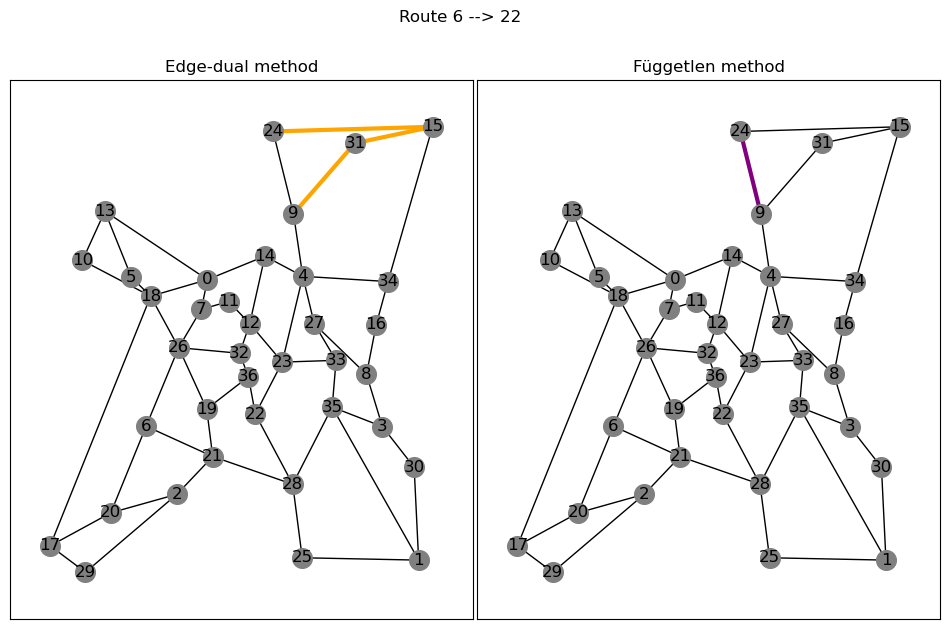

In [8]:
plot_paths(model.g_base, model.g_base_pos, resPathDict[simId]["djk_path"], resPathDict[simId]["fuggetlen_path"], 6,22, fgSize=(12,7))

In [9]:
model.get_srlg_info_table(miniNetwork)

,idx,edgeNum,prob,connected,diameter,usable
0,4386,2,2.606800e-07,True,2,True
1,4387,1,7.452382e-06,True,1,True
2,4388,1,1.485876e-05,True,1,True
3,4419,2,9.200471e-08,True,2,True
4,4421,1,4.830247e-06,True,1,True
5,5498,2,4.600236e-08,True,2,True
6,5499,1,2.606800e-06,True,1,True
7,5633,2,1.380071e-07,True,2,True


## Plot usage of edges

In [30]:
not_equal_path_list = resDf[resDf["ed_avb_class"] != "eq"]["simID"].to_list()

a = []
b = []
for i in not_equal_path_list:
    a += resPathDict[i]["djk_path"]
    b += resPathDict[i]["fuggetlen_path"]

ad = pd.Series(a).value_counts().to_dict()
bd = pd.Series(b).value_counts().to_dict()
ad_width = minmaxScale(np.array([ad[edge] if edge in ad.keys() else 0 for edge in model.g_base.edges]), 1, 15)
bd_width = minmaxScale(np.array([bd[edge] if edge in bd.keys() else 0 for edge in model.g_base.edges]), 1, 15)

st_nodes = np.unique(resDf[resDf["simID"].isin(not_equal_path_list)][["start", "target"]].to_numpy().flatten())
node_colors = ["lightblue" if i in st_nodes else "white" for i in model.g_base.nodes]
node_sizes = [450 if i in st_nodes else 300 for i in model.g_base.nodes]

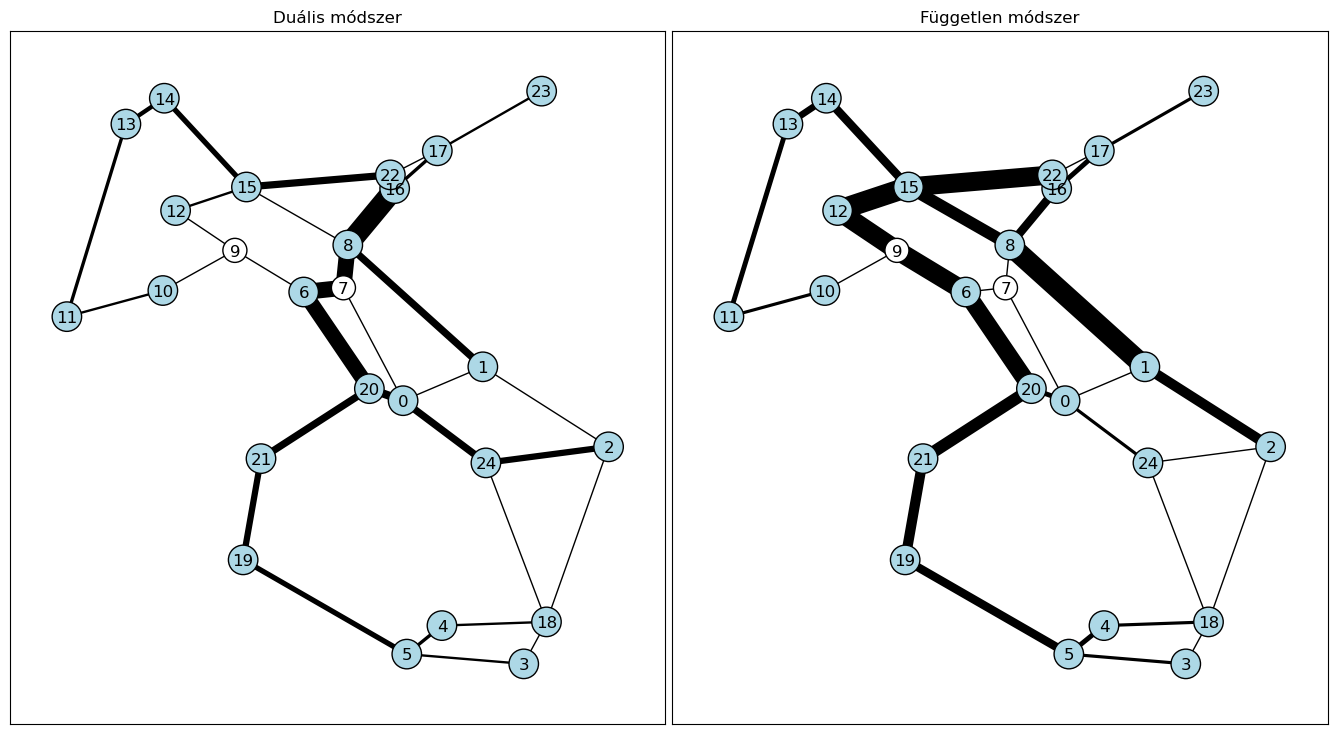

In [31]:
options = {
    'node_size': node_sizes,
    'node_color': node_colors,
    'edgecolors': 'black',
    'font_size': 12,
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

fig,ax = plt.subplots(ncols=2,figsize=(17,9))
plt.subplots_adjust(wspace=0.01)
nx.draw_networkx(model.g_base, model.g_base_pos, ax = ax[0], width = ad_width, **options)
ax[0].set_title("Duális módszer")
nx.draw_networkx(model.g_base, model.g_base_pos, ax = ax[1], width = bd_width, **options)
ax[1].set_title("Független módszer")

plt.show()

# old plots

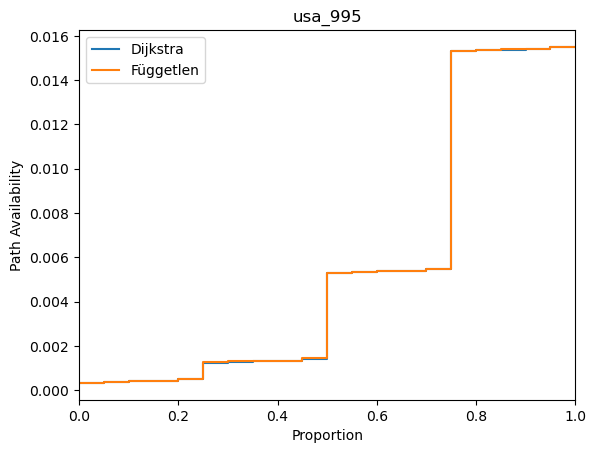

In [121]:
sns.ecdfplot(data=resDf[resDf["simID"].isin(not_equal_path_list)], y = "ed_avb_djk", label = "Dijkstra")
sns.ecdfplot(data=resDf[resDf["simID"].isin(not_equal_path_list)], y = "ed_avb_fugg", label = "Független")
#sns.ecdfplot(data=resDf[resDf["simID"].isin(not_equal_path_list)], y = "ed_avb_sht", label = "shortest")
plt.ylabel("Path Availability")
plt.legend()
plt.title(network)
plt.show()

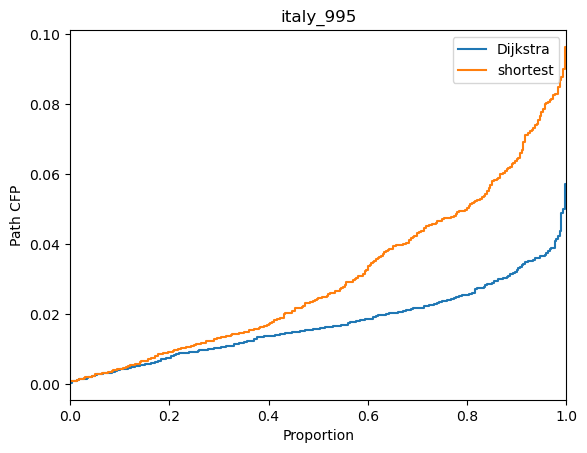

In [12]:
sns.ecdfplot(data=resDf, y = "err_djk", label = "Dijkstra")
sns.ecdfplot(data=resDf, y = "err_sht", label = "shortest")
plt.ylabel("Path CFP")
plt.legend()
plt.title(network)
plt.show()

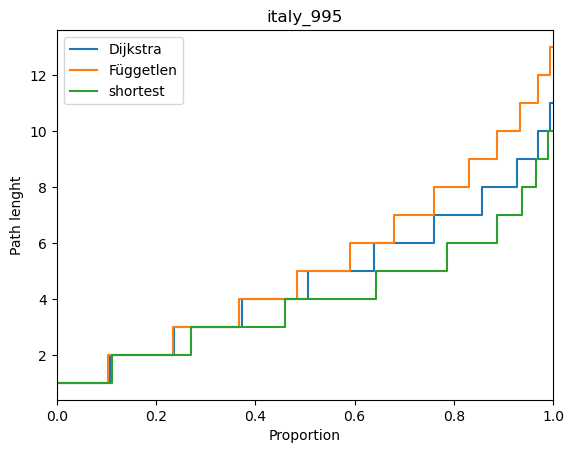

In [13]:
sns.ecdfplot(data=resDf, y = "len_djk", label = "Dijkstra")
sns.ecdfplot(data=resDf, y = "len_fugg", label = "Független")
sns.ecdfplot(data=resDf, y = "len_sht", label = "shortest")
plt.ylabel("Path lenght")
plt.legend()
plt.title(network)
plt.show()

<Axes: xlabel='Proportion', ylabel='ed_avb_diff'>

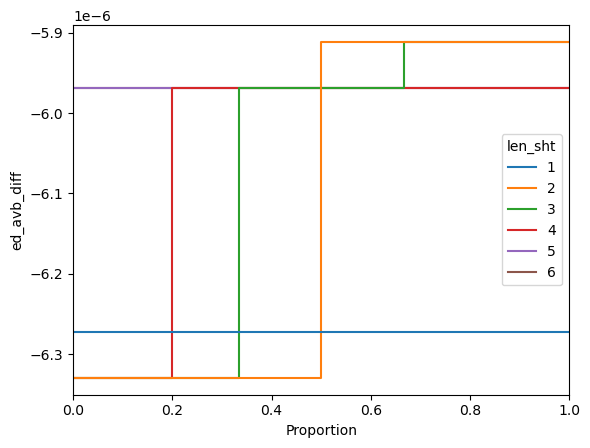

In [33]:
sns.ecdfplot(data=resDf[resDf["ed_avb_diff"] != 0], y = "ed_avb_diff", hue="len_sht", palette="tab10")

<Axes: xlabel='len_sht', ylabel='value'>

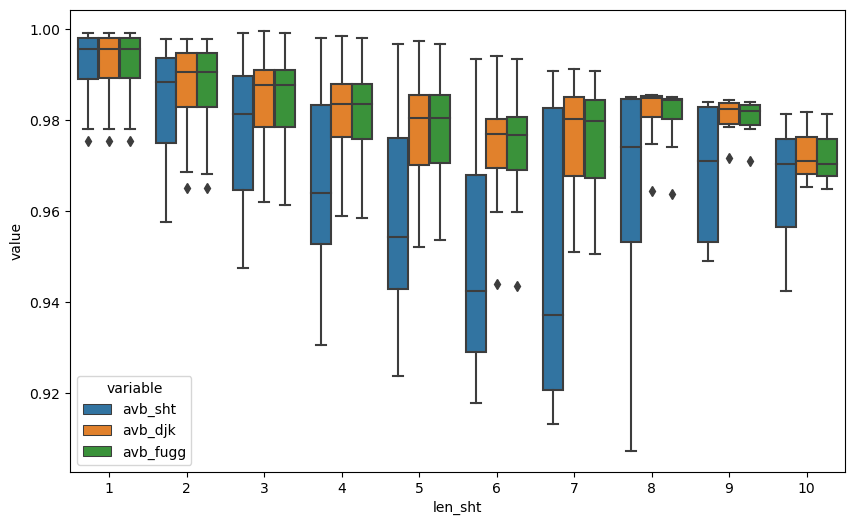

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.melt(resDf[["avb_sht", "avb_djk", "avb_fugg", "len_sht"]], id_vars=["len_sht"]),
            x = "len_sht", y = "value", hue="variable")